# Student Performance Dataset: Exploratory Data Analysis

In this project, we are going to analyze the Student Performance dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/student+performance).

We will try to answer the following questions:

* Does alcohol consumption affect student performance?
* What factors impact student study time?
* Do extra paid classes help to improve student performance?

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("student-mat.csv", sep=";")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

The dataset does not have missing values.

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Many of the variables in the dataset are categorical, represented as numeric values.

## Does alcohol consumption affect student performance?

In this question we want to oberserve overall alcohol consumption. For this reason, we will combine both weekday and weekend alcohol consumption.

In [6]:
df['Dalc'] = df['Dalc'] + df['Walc']

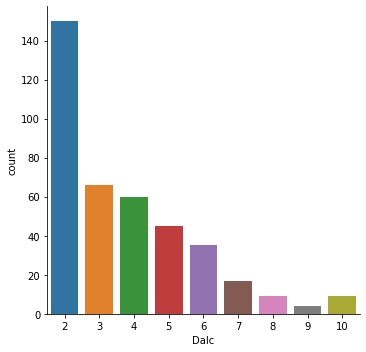

In [7]:
sns.catplot('Dalc', data=df, kind='count')

From this plot, we can see that all students in the dataset consume alcohol at least twice a week.

In [8]:
avg = round(sum(df.G3) / len(df), 2)
print("Student grade average is {}. Roughly a {}.".format(avg, avg*5))

Student grade average is 10.42. Roughly a 52.1.


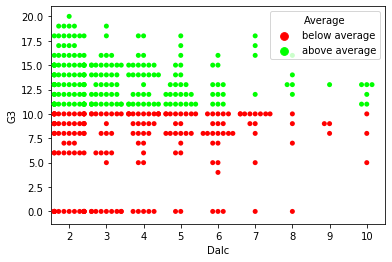

In [9]:
df['Average'] = ['above average' if i > avg else 'below average' for i in df.G3]
graph = sns.swarmplot('Dalc', 'G3', hue = 'Average', data=df, palette={'above average':'lime', 'below average': 'red'})

From the plot, we can see that a majority of those that scored above average do not drink as heavily compared to those that do.

In [10]:
cor = round(np.corrcoef(x=np.array([df.G3, df.Dalc]))[0,1], 4)
print("The correlation coefficient between final grade score and drinking intensity is {}.".format(cor))

The correlation coefficient between final grade score and drinking intensity is -0.0582.


This coincides with our scatterplot where drinking has a strong ($\pm$ 0.5 - $\pm$ 1) negative correlation with student grades.

## What factors impact student study time?

To answer this question we can obeserve variables that may impact student study time such as after school activities and student relationship status.

In [11]:
from scipy.stats import chi2_contingency

### Activities

In [12]:
indices = ["< 2 hrs", "2 - 5 hrs", "5 - 10 hrs", "> 10 hrs"]

freq = pd.crosstab(index=df["studytime"], columns="count")
freq.index = indices
freq

col_0,count
< 2 hrs,105
2 - 5 hrs,198
5 - 10 hrs,65
> 10 hrs,27


In [13]:
joint_dist = pd.crosstab(index=df["studytime"], columns=df["activities"])
joint_dist.index = indices
joint_dist

activities,no,yes
< 2 hrs,59,46
2 - 5 hrs,95,103
5 - 10 hrs,29,36
> 10 hrs,11,16


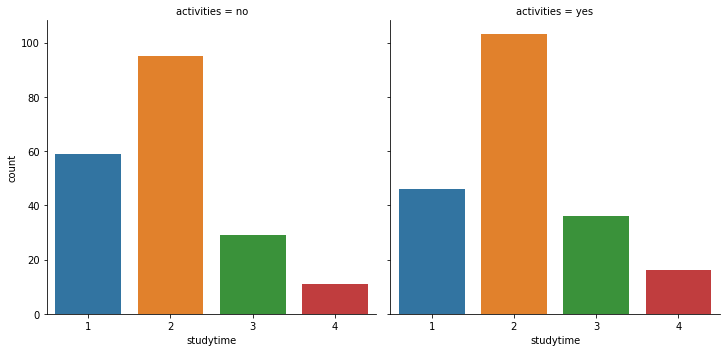

In [14]:
sns.catplot('studytime', col="activities", data=df, kind='count')

In [15]:
conditional_dist = pd.crosstab(df['studytime'], df['activities']).apply(lambda r : r/r.sum(), axis=0)
conditional_dist.index = indices
conditional_dist

activities,no,yes
< 2 hrs,0.304124,0.228856
2 - 5 hrs,0.489691,0.512438
5 - 10 hrs,0.149485,0.179104
> 10 hrs,0.056701,0.079602


While this table shows the conditional distribution of student study times given their activities. We can see that 70%-80% of students study less than 5 hours in both categories.

In [16]:
obs = pd.crosstab(df['studytime'], columns=df['activities'])
chi2, p, dof, expected = chi2_contingency(obs)
print('The chi2 statistic is {}, with a p-value of {} and significance level of 0.05'.format(round(chi2, 3), round(p, 3)))

The chi2 statistic is 3.49, with a p-value of 0.322 and significance level of 0.05


From the chi2 test of independence, we accept the null hypothesis. This concludes that there is no relationship between studytime and activities (variables are independent from each other).

### Relationship status

In [17]:
joint_dist = pd.crosstab(index=df["studytime"], columns=df['romantic'])
joint_dist.index = indices
joint_dist

romantic,no,yes
< 2 hrs,79,26
2 - 5 hrs,126,72
5 - 10 hrs,36,29
> 10 hrs,22,5


In [18]:
conditional_dist = pd.crosstab(df['studytime'], df['romantic']).apply(lambda r : r/r.sum(), axis=0)
conditional_dist.index = indices
conditional_dist

romantic,no,yes
< 2 hrs,0.300380,0.196970
2 - 5 hrs,0.479087,0.545455
5 - 10 hrs,0.136882,0.219697
> 10 hrs,0.083650,0.037879


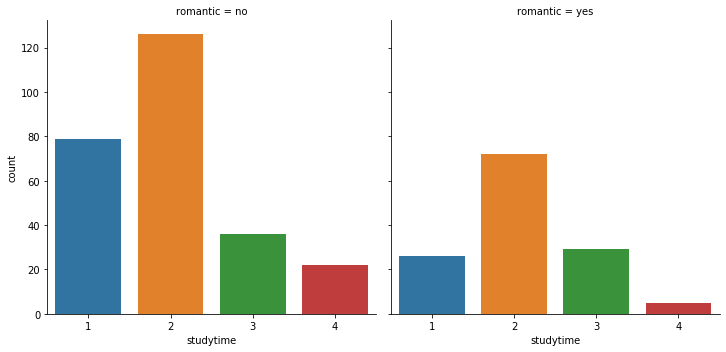

In [19]:
sns.catplot('studytime', col="romantic", data=df, kind='count')

Briefly looking at the tables, we see that there are more students are not in a relationship. We can also see that there are more students that study between 5 or more hours with no relationship compared to those that are.

In [20]:
obs = pd.crosstab(df['studytime'], columns=df['romantic'])
chi2, p, dof, expected = chi2_contingency(obs)
print('The chi2 statistic is {}, with a p-value of {} and significance level of 0.05'.format(round(chi2, 3), round(p, 3)))

The chi2 statistic is 10.665, with a p-value of 0.014 and significance level of 0.05


From the chi2 test of independence, we reject the null hypothesis and accept the alternative hypothesis. This concludes that there is a statistical relationship between student study times and student relationship status (variables are dependent on each other).

## Do extra paid classes help to improve student performance?
In this question, we want to observe whether students with additional learning material provides a significant increase in student grades.

In [21]:
from scipy.stats import levene, normaltest, wilcoxon
import random as rand

In [22]:
pd.crosstab(df['paid'], columns='count')

col_0,count
paid,
no,214
yes,181


In [23]:
yes = df[df['paid']=='yes']
no = df[df['paid']=='no']

In [24]:
yes_avg = yes['G3'].mean()
no_avg = no['G3'].mean()
print("Students that took extra classes got an average of {}, while those that did not got an average of {}".format(round(yes_avg, 3), round(no_avg, 3)))

Students that took extra classes got an average of 10.923, while those that did not got an average of 9.986


In [25]:
yes_std = yes['G3'].std()
no_std = no['G3'].std()
print("Students that took extra classes have a standard deviation of {}, while those that did not have a standard deviation of {}".format(round(yes_std, 3), round(no_std, 3)))

Students that took extra classes have a standard deviation of 3.791, while those that did not have a standard deviation of 5.126


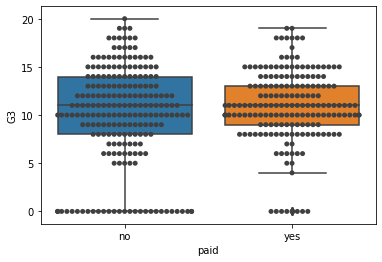

In [26]:
sns.boxplot(x=df['paid'], y=df['G3'])
sns.swarmplot(x=df['paid'], y=df['G3'], color='.25')

Comparing both catgories, we can see that there are many more students received scores of 0 that did not take extra classes than those that did.

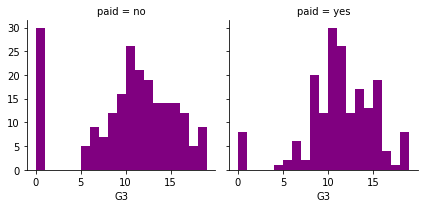

In [27]:
bins = np.arange(0, 20)
g = sns.FacetGrid(df, col="paid")
g = g.map(plt.hist, "G3", bins=bins, color='purple')

The grade distributions for those that did take additional classes has a lower standard deviation. This means that the scores are more centralized along the mean. This would indicate that taking additional classes increases consistency in student performance.

### Hypothesis Testing
Significance level of 0.05

In [28]:
test_stat, p = normaltest(df[df['paid']=='yes']['G3'])
print("The test statistic is {}, with a p-value of {}".format(round(test_stat, 3), round(p, 5)))
test_stat, p = normaltest(df[df['paid']=='no']['G3'])
print("The test statistic is {}, with a p-value of {}".format(round(test_stat, 3), round(p, 5)))

The test statistic is 20.489, with a p-value of 4e-05
The test statistic is 12.789, with a p-value of 0.00167


Based on the hypothesis test of normality, we reject the null hypothesis (sample is normal) and accept the alternative hypothesis (sample is not normal distributed).

In [29]:
test_stat, p = levene(df[df['paid']=='yes']['G3'], df[df['paid']=='no']['G3'])
print("The test statistic is {}, with a p-value of {}".format(round(test_stat, 3), round(p, 5)))

The test statistic is 13.123, with a p-value of 0.00033


From the Levene test of equal variances between two samples, we reject the null hypothesis of equal variances and accept the alternative hypothesis of differing variances between the sample populations.

Since the assumptions of parametric t-test are violated, we have to use non-parameteric testing.

The question we want to answer is whether additional paid classes improves student scores. We can answer this using the Wilcoxon signed rank-test to compare the differences in median scores. In this case we have a two-tailed Wilcoxon test.

$$
Ho : u_1 - u_2 = 0
$$
$$
Ha : u_1 - u_2 \neq 0
$$

In [30]:
seed = rand.seed(444)

X = df[df['paid']=='yes']['G3']
Y = rand.sample(list(df[df['paid']=='no']['G3']), 181)

t_stat, p = wilcoxon(x=X, y=Y)
print("The test statistic is {}, with a p-value of {}.".format(round(t_stat, 3), round(p, 3)))

The test statistic is 5225.5, with a p-value of 0.003.


From the Wilcoxon signed rank-test, there is a statistical difference between the two sample pairs where additional classes does affect student performance. 